## 6.7 AdaGrad算法
上节我们学习了动量法，它从优化梯度计算的角度改善了随机梯度下降方法。当然，动量法也可以应用于小批量随机梯度下降法和其他类型的梯度下降法，如批量梯度下降法。但注意，本质上说动量法不是批量梯度下降法。那问题来了，基础的批量梯度下降法还有改进的空间吗? 有的，这就是后来的Adagrad算法。本节咱们就来详细介绍它。

### 6.7.1 基本思想

Adagrad算法是一种梯度下降法，它是对批量梯度下降法的改进，但并不是对动量法的改进。Adagrad算法的目的是在解决优化问题时自动调整学习率，以便能够更快地收敛。

在优化问题中，我们通常需要找到使目标函数最小的参数值。批量梯度下降法是一种求解此类问题的方法，它在每次迭代时使用整个数据集来计算梯度。然而，批量梯度下降法的收敛速度可能较慢，因为它需要较多的计算。Adagrad算法在每次迭代中，会根据之前的梯度信息自动调整每个参数的学习率。具体来说，使用如下公式：

$$\theta_i = \theta_i - \frac{\alpha}{\sqrt{\sum_{j=1}^{t} g_{i,j}^2}} g_{i,t}$$

其中，$\theta_i$ 是参数 $i$ 的当前值，$\alpha$ 是学习率，$g_{i,t}$ 是在第 $t$ 次迭代中参数 $i$ 的梯度，$\sum_{j=1}^{t} g_{i,j}^2$ 是参数 $i$ 在之前的所有迭代中梯度的平方和。

Adagrad算法会在每次迭代中计算每个参数的梯度平方和，并使用这些平方和来调整学习率。这样，Adagrad算法就可以使用较小的学习率来解决那些更难优化的参数，而使用较大的学习率来解决更容易优化的参数。

### 6.7.2 优缺点

Adagrad算法优缺点是十分突出的。先看优点：首先，它能够有效地处理稀疏特征，因为它能够自动调整每个特征的学习率，使得稀疏特征的更新更少。这个稀疏特征具体是什么呢？我们下面会详细介绍。其次，Adagrad 算法能够自动调整学习率，使得模型在训练过程中能够更快地收敛。缺点方面，一来它的学习率在每次迭代中都会减小，所以可能会在训练过程的后期变得非常小。这可能会导致模型在训练过程的后期出现收敛速度缓慢的问题。二来，Adagrad 算法对于不同的参数调整学习率的方式是固定的，不能根据不同的任务自动调整。这意味着在某些情况下，Adagrad 算法可能不能很好地处理模型的学习问题。

### 6.7.3 稀疏特征问题

稀疏特征指的是在很多样本中只有少数出现过的特征。这种情况下，在训练模型时，这些稀疏特征可能很少更新，并且当它们更新时，可能会带来很大的影响。这可能会导致模型训练不出理想的结果。

在数学上，假设我们有一个训练集 $X$，其中 $X_{i,j}$ 表示第 $i$ 个样本的第 $j$ 个特征的值。如果 $X_{i,j}=0$，则表示第 $j$ 个特征在第 $i$ 个样本中没有出现过。在这种情况下，第 $j$ 个特征就是一个稀疏特征。

假设我们正在使用梯度下降算法来训练模型，那么在每次迭代时，我们都会对每个参数 $w_j$ 进行更新，公式如下：

$$w_j \leftarrow w_j - \eta \frac{\partial L}{\partial w_j}$$

其中 $L$ 是损失函数，$\eta$ 是学习率。对于稀疏特征的参数 $w_j$，由于它在训练集中出现的频率较低，所以其梯度 $\frac{\partial L}{\partial w_j}$ 也会相应的变小，从而导致模型的收敛速度变慢。这就是稀疏特征带来的问题。

在很多实际应用中，稀疏特征是很常见的。例如，在文本分类问题中，每篇文章中只有很少的单词会出现多次，其他的单词大多是稀疏特征。在训练文本分类模型时，如果不能有效地处理稀疏特征，则模型的效果可能不会很好。

为了解决稀疏特征问题，可以使用优化算法，例如 Adagrad 算法，来调整每个特征的学习率，使得稀疏特征的更新更少。也可以使用特殊的损失函数，如 FTRL 损失函数，来解决稀疏特征问题。此外，还可以使用一些预处理技术，例如词袋模型，来将稀疏特征转化为稠密特征，从而更容易处理。

### 6.7.4 代码示例

下面我们演示一个使用Adagrad 算法训练线性回归模型的例子，让你对它的实现有更加感性的认识。我们在最后会可视化训练过程中的损失。

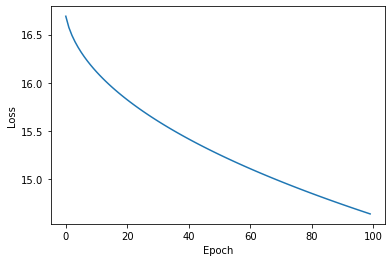

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch
import matplotlib.pyplot as plt

# 假设我们有一个简单的线性回归模型
# y = w * x + b
# 其中 w 和 b 是需要学习的参数

# 定义超参数
learning_rate = 0.01
num_epochs = 100

# 随机生成训练数据
X = torch.randn(100, 1)
y = 2 * X + 3 + torch.randn(100, 1)

# 初始化参数
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 创建 Adagrad optimizer
optimizer = torch.optim.Adagrad([w, b], lr=learning_rate)

# 记录每次迭代的 loss
losses = []

# 训练模型
for epoch in range(num_epochs):
  # 计算预测值
  y_pred = w * X + b

  # 计算 loss
  loss = torch.mean((y_pred - y) ** 2)

  # 记录 loss
  losses.append(loss.item())

  # 清空上一步的梯度
  optimizer.zero_grad()

  # 计算梯度
  loss.backward()

  # 更新参数
  optimizer.step()

# 可视化训练过程
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

[Next 6-8 RMSProp算法](./6-8%20RMSProp算法.ipynb)